<a href="https://colab.research.google.com/github/LinkHS/Colab/blob/main/Mapping/gaussian_grid_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [6]:
def generate_gaussian_grid_map(ox, oy, xyreso, std):
  minx, miny, maxx, maxy, xw, yw = calc_grid_map_config(ox, oy, xyreso)

  gmap = [[0.0 for i in range(yw)] for i in range(xw)]

  for ix in range(xw):
    for iy in range(yw):
      x = ix * xyreso + minx
      y = iy * xyreso + miny

      # Search minimum distance
      mindis = float("inf")
      for (iox, ioy) in zip(ox, oy):
        d = math.hypot(iox - x, ioy - y)
        if mindis >= d:
          mindis = d

      pdf = (1.0 - norm.cdf(mindis, 0.0, std))
      gmap[ix][iy] = pdf

  return gmap, minx, maxx, miny, maxy

In [2]:
EXTEND_AREA = 10.0  # [m] grid map extention length

def calc_grid_map_config(ox, oy, xyreso):
  minx = round(min(ox) - EXTEND_AREA / 2.0)
  miny = round(min(oy) - EXTEND_AREA / 2.0)
  maxx = round(max(ox) + EXTEND_AREA / 2.0)
  maxy = round(max(oy) + EXTEND_AREA / 2.0)
  xw = int(round((maxx - minx) / xyreso))
  yw = int(round((maxy - miny) / xyreso))

  return minx, miny, maxx, maxy, xw, yw

In [3]:
def draw_heatmap(data, minx, maxx, miny, maxy, xyreso):
  x, y = np.mgrid[slice(minx - xyreso/2.0, maxx + xyreso/2.0, xyreso),
                slice(miny - xyreso/2.0, maxy + xyreso/2.0, xyreso)]
  plt.pcolor(x, y, data, vmax=1.0, cmap=plt.cm.Blues)
  plt.axis("equal")

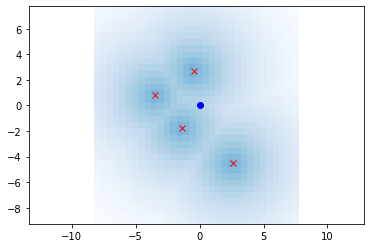

In [29]:
from IPython import display

def main(show_animation=True):
  xyreso = 0.5  # xy grid resolution
  STD = 5.0  # standard diviation for gaussian distribution
  fig = plt.figure()

  for i in range(5):
    ox = (np.random.rand(4) - 0.5) * 10.0
    oy = (np.random.rand(4) - 0.5) * 10.0
    gmap, minx, maxx, miny, maxy = generate_gaussian_grid_map(
        ox, oy, xyreso, STD)

    if show_animation:  # pragma: no cover
      plt.cla()
      draw_heatmap(gmap, minx, maxx, miny, maxy, xyreso)
      plt.plot(ox, oy, "xr")
      plt.plot(0.0, 0.0, "ob")
      display.display(fig)
      time.sleep(1)
      display.clear_output(wait=True)

main()